# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import warnings
from sklearn.exceptions import ConvergenceWarning
# Ignorar las advertencias de convergencia
warnings.filterwarnings("ignore", category=ConvergenceWarning)
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv",sep=',')
data.to_csv('/workspaces/k_means_joeld/data/raw/housing.csv',index=False)
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [2]:
data.drop(['HouseAge','AveRooms','AveBedrms','Population','AveOccup','MedHouseVal'],axis=1,inplace=True)
data.head()

MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25

In [3]:
scaler = MinMaxScaler()
data_scaler = scaler.fit_transform(data)
data_scaler =  pd.DataFrame(data_scaler,columns = data.columns)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

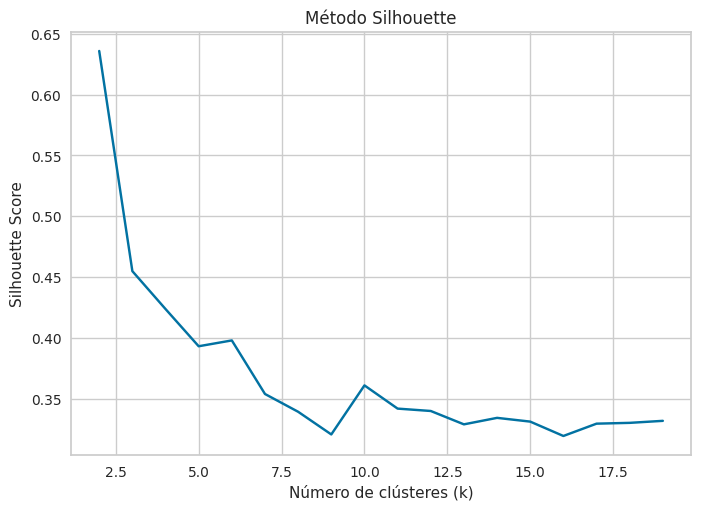

In [4]:
# Definir el rango de número de clústeres para probar
k_values = range(2, 20)

# Inicializar listas para almacenar los valores de silhouette para cada número de clústeres
silhouette_scores = []

for k in k_values:
  cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(data_scaler)
  silhouette_scores.append(silhouette_score(data_scaler, cluster_labels))

plt.plot(k_values, silhouette_scores)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

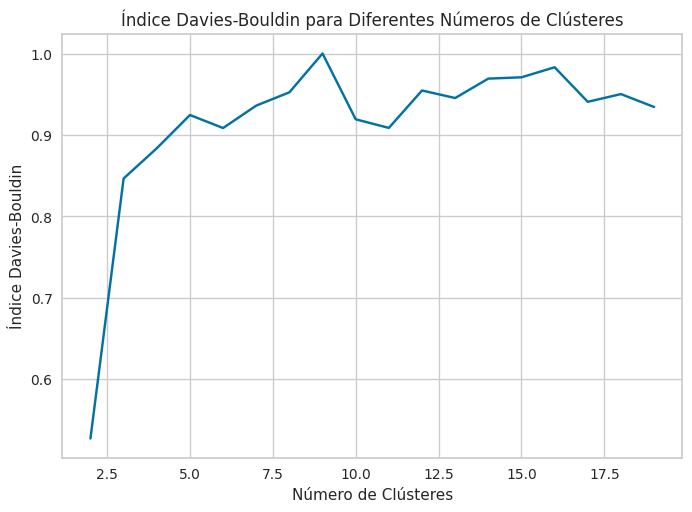

In [5]:
num_clusters = range(2, 20)
db_scores = []

# Probar diferentes valores de k
for k in num_clusters:
    cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(data_scaler)
    db_scores.append(davies_bouldin_score(data_scaler, cluster_labels))

plt.plot(num_clusters, db_scores)
plt.title('Índice Davies-Bouldin para Diferentes Números de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Índice Davies-Bouldin')
plt.show()

En las graficas podemos comprobar que el numero ideal de k seria 6 si 

In [6]:
X_train, X_test = train_test_split(data_scaler, test_size=0.2, random_state=42)

In [7]:
model = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [8]:
y_train = model.labels_
X_train["cluster"] = y_train
X_train.head()

MedInc  Latitude  Longitude  cluster
14196  0.190322  0.018066   0.729084        3
8267   0.228452  0.130712   0.616534        3
17445  0.252162  0.225292   0.385458        0
14265  0.099488  0.015940   0.721116        3
2271   0.210638  0.450584   0.453187        0

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

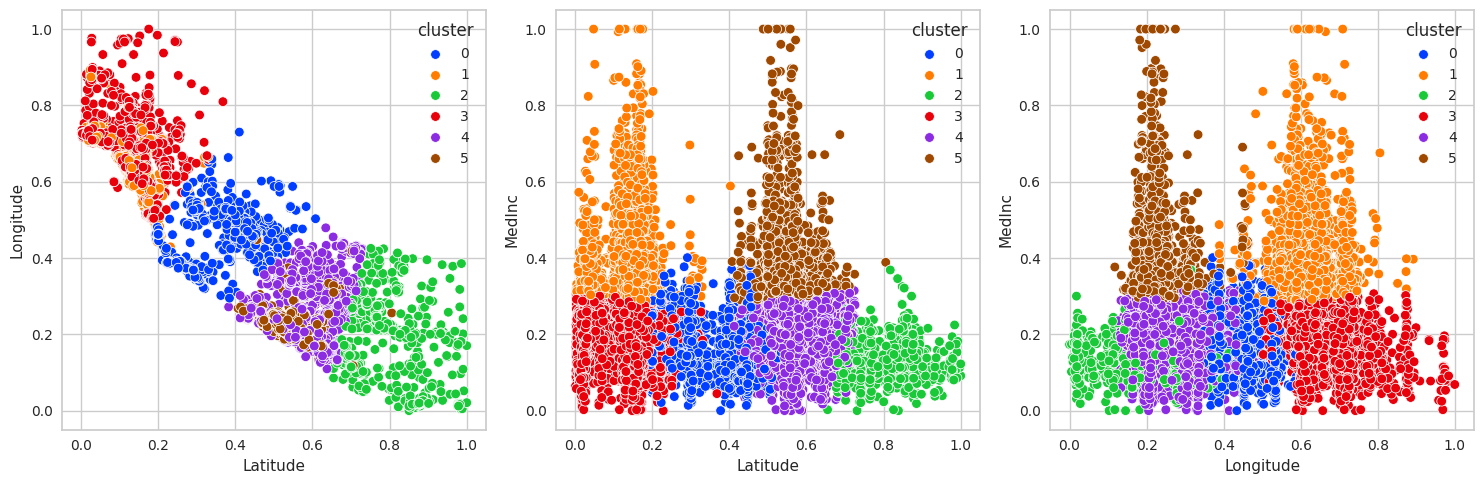

In [9]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster",  palette = "bright")
plt.tight_layout()

plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

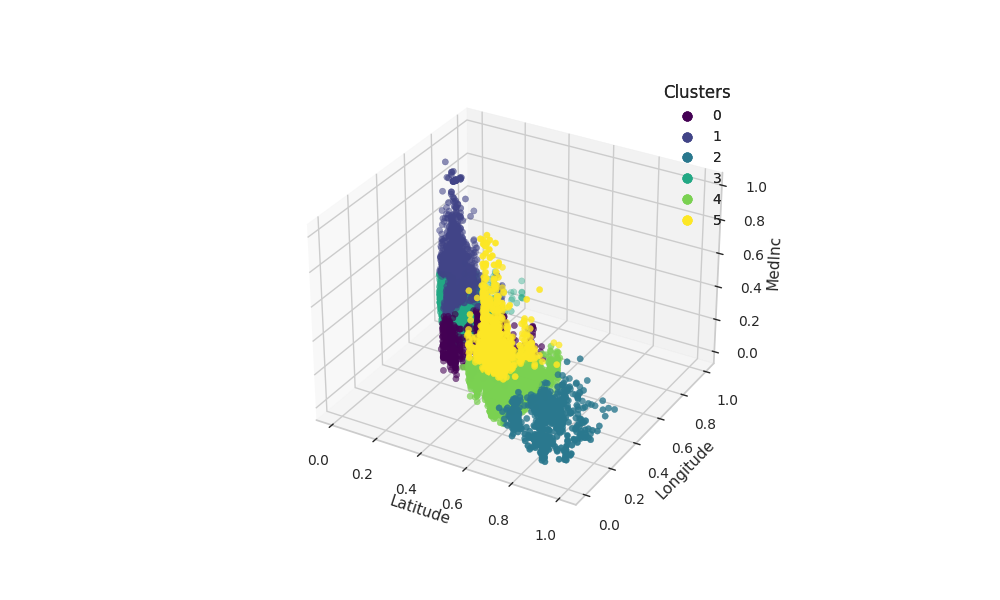

In [10]:
from mpl_toolkits import mplot3d
#  visualización interactiva
%matplotlib widget

# Crear una figura y un conjunto de ejes 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
scatter = ax.scatter(X_train['Latitude'], X_train['Longitude'], X_train['MedInc'], c=X_train['cluster'], cmap='viridis')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('MedInc')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Mostrar el gráfico
plt.show()

vemos una correlacion negativa en la latitud y la longitud y luego si vemso que hay grupos mascados en cuanto a la ubicacion y el ingreso medio 


In [11]:
y_test = model.predict(X_test)
X_test["cluster"]= y_test


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

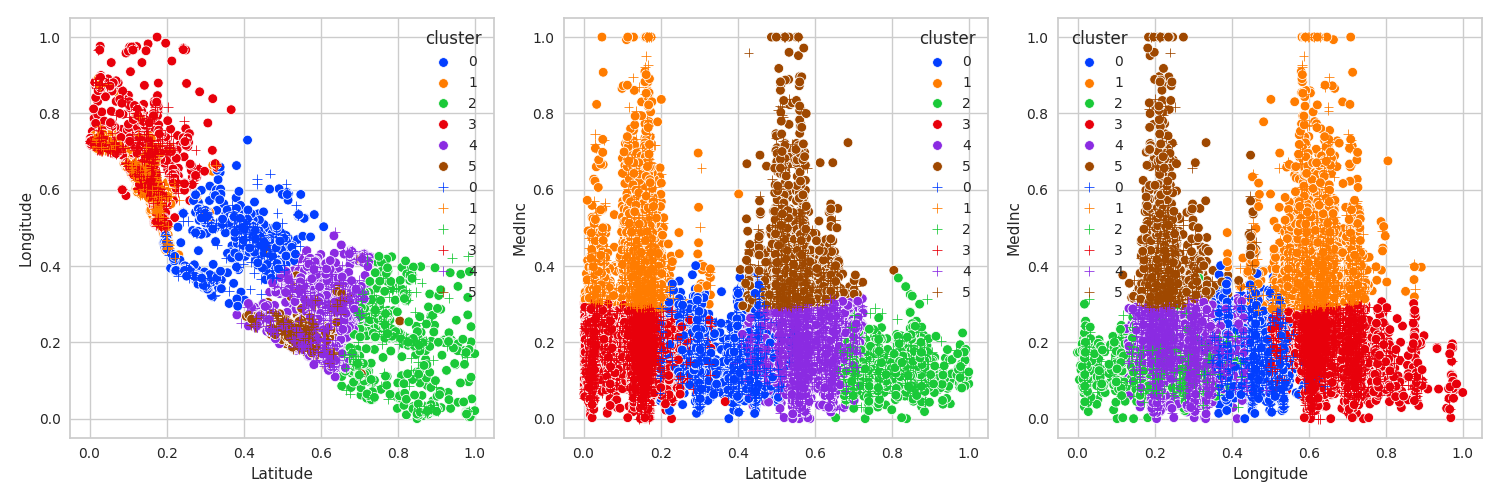

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

In [12]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster",  palette = "bright")

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright", marker="+", s=50)
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright", marker="+", s=50)
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright", marker="+", s=50)
plt.tight_layout()

plt.show()

podemos ver que el modelo predice bastante bien 
vamos a proceder a utilizar algun otro modelo de clasificacion a ver que tal le va 

In [ ]:
model = RandomForestClassifier(n_estimators = 60, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:

def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    train_accuracy = accuracy_score(y_train,y_pred_train)
    train_precision = precision_score(y_train, y_pred_train,average='macro')

    test_accuracy = accuracy_score(y_test,y_pred_test)
    test_precision = precision_score(y_test, y_pred_test,average='macro')

    diff_accuracy = train_accuracy - test_accuracy
    diff_precision = train_precision - test_precision
    metrics_df = pd.DataFrame([[train_accuracy, train_precision],[test_accuracy,test_precision,],[diff_accuracy, diff_precision]],
                              columns = ['Accuracy',  'Precision',],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df





In [ ]:
get_metrics(y_train, y_test, train_pred, test_pred)

Accuracy  Precision
Train            1.0        1.0
Test             1.0        1.0
Diferencia       0.0        0.0

In [ ]:
hyperparams = {
    "n_estimators":[10,30,50],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid = GridSearchCV(model, hyperparams, scoring = "precision", cv = 5)

In [ ]:
grid.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/home/vscode/.local/lib/python3.10/site-pa

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=60, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 30, 50]},
             scoring='precision')

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
model = RandomForestClassifier(n_estimators = 10,criterion='gini', max_depth = None, min_samples_leaf=1,min_samples_split=2, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
train_pred_best = model.predict(X_train)
test_pred_best = model.predict(X_test)

In [ ]:
get_metrics(y_train, y_test, train_pred_best, test_pred_best)

Accuracy  Precision
Train            1.0        1.0
Test             1.0        1.0
Diferencia       0.0        0.0

En este caso podemos ver que no tiene sentido hacer un modelo supervisado luego de uno supervisado las metricas que dan luego pueden ser engañosas 